In [35]:
from collections import defaultdict
from nltk.corpus import stopwords
from wordcloud import WordCloud
import tqdm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import sys
sys.path.append('../')

from src.config import *

stop = set(stopwords.words('english'))

data_url = f'{DATA_FOLDER_PATH_PROCESSED}/data_consolidated.xlsx'
df = pd.read_excel(data_url)

In [3]:
def create_corpus(df, col):
    corpus = []

    for x in tqdm.tqdm(df[col].str.split()):
        if x == x:
            for i in x:
                corpus.append(i)

    return corpus

100%|██████████| 115947/115947 [00:00<00:00, 2773249.12it/s]


<BarContainer object of 30 artists>

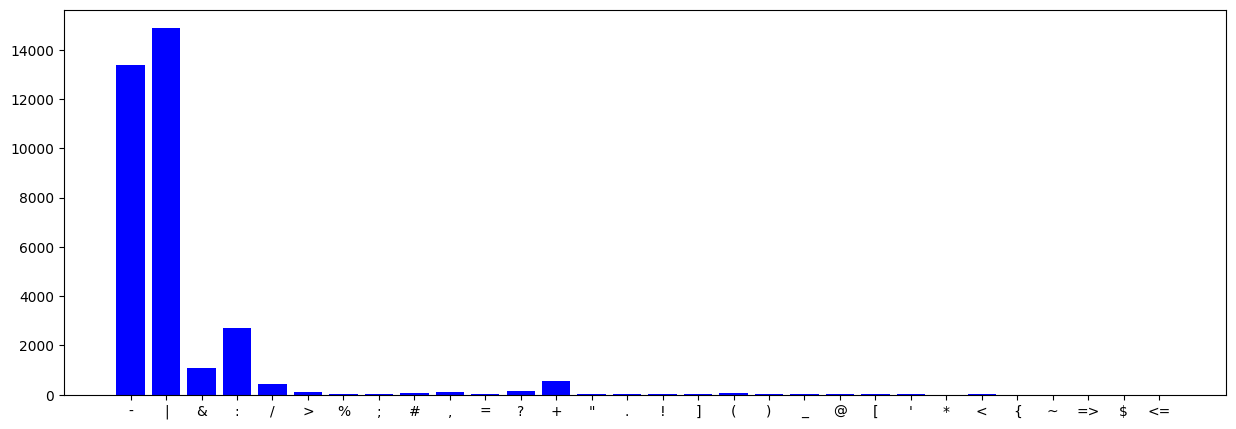

In [4]:
import string

corpus = create_corpus(df, 'Title')
plt.figure(figsize=(15,5))

dic = defaultdict(int)
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1
x,y = zip(*dic.items())
plt.bar(x,y, color = 'blue')

In [25]:
def top_n_words(df, col):
    corpus = create_corpus(df, col)

    dic = defaultdict(int)
    for word in corpus:
        if word not in stop:
            dic[word] += 1
            
    top_n = 50 
    top = sorted(dic.items(), key=lambda x:x[1], reverse=True)[:top_n]

    plt.rcParams['figure.figsize'] = (20, 5)
    plt.style.use('fivethirtyeight')
    x, y = zip(*top)
    plt.bar(x, y, color = 'blue')
    plt.title(f'Top {top_n} Words', fontsize = 20)
    # plt.xlabel('Words')
    plt.ylabel('Count')
    plt.xticks(rotation = 90, horizontalalignment = 'center')
    plt.show()


In [39]:
def plot_word_cloud(df, col):
    corpus = create_corpus(df, col)
    plt.figure(figsize=(16,12))
    word_cloud = WordCloud(
                            background_color='black',
                            max_font_size = 30
                            ).generate(" ".join(corpus[:200]))
    plt.imshow(word_cloud)
    plt.axis('off')
    plt.show()

100%|██████████| 115947/115947 [00:00<00:00, 4027903.34it/s]


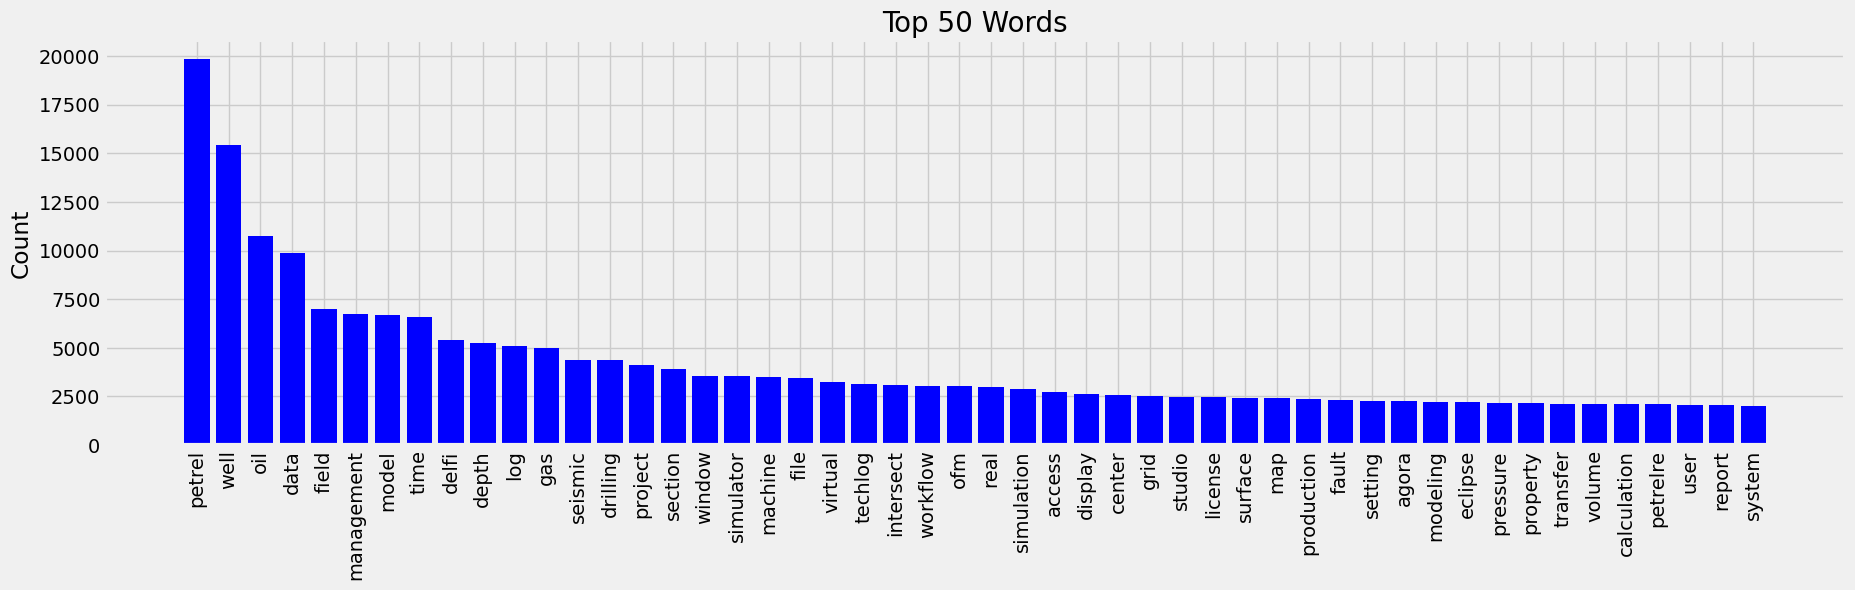

In [26]:
top_n_words(df, 'Tags')

100%|██████████| 115947/115947 [00:00<00:00, 3567596.86it/s]


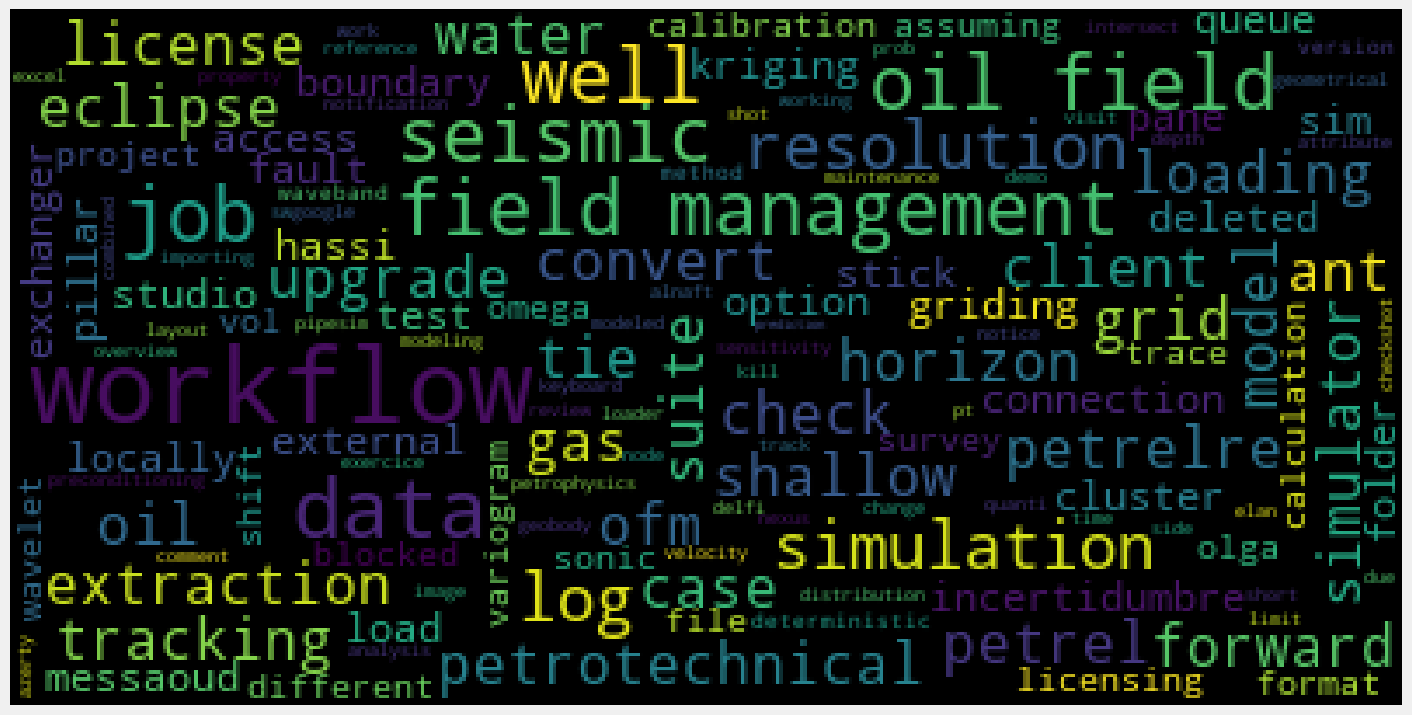

In [40]:
plot_word_cloud(df, 'Tags')